In [126]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data and view 

df = pd.read_csv('/Users/nickwalter/Downloads/heart_data.csv')
df

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,130,2,2,62,0,97,0,0,1,263,1.2,0,1,1
293,100,3,0,58,0,122,0,0,1,248,1.0,2,0,0
294,138,3,0,59,0,182,0,1,0,271,0.0,2,0,0
295,130,3,2,56,1,103,1,1,2,283,1.6,2,0,1


In [6]:
#checking for null values

df.isnull().sum()

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
st_depression      0
rest_ecg           0
num_vessels        0
diagnosis          0
dtype: int64

<Axes: xlabel='chest_pain', ylabel='count'>

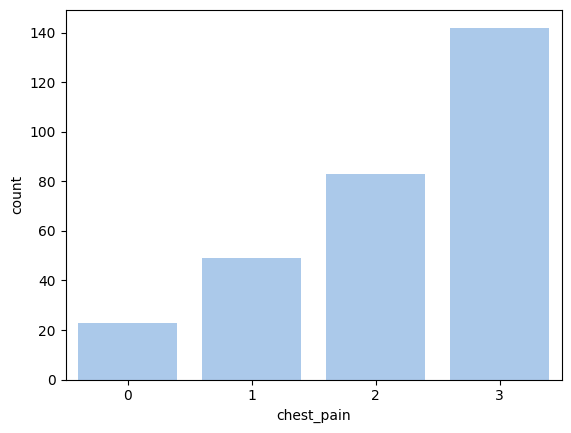

In [22]:
#visual exploration of categorical variables

sns.set_palette("pastel")

sns.countplot(x='chest_pain', data=df)

<Axes: xlabel='thalassemia', ylabel='count'>

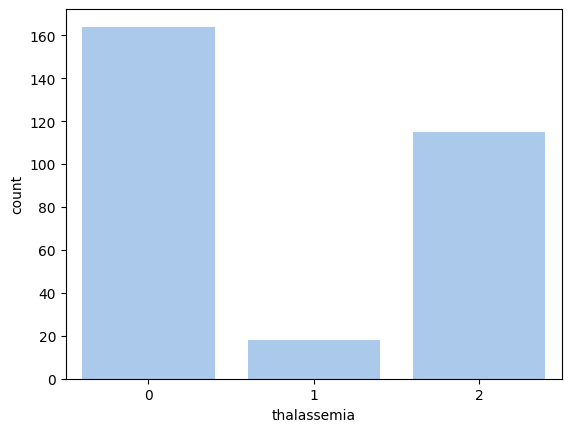

In [20]:
sns.countplot(x='thalassemia', data=df)

<Axes: xlabel='fasting_bs', ylabel='count'>

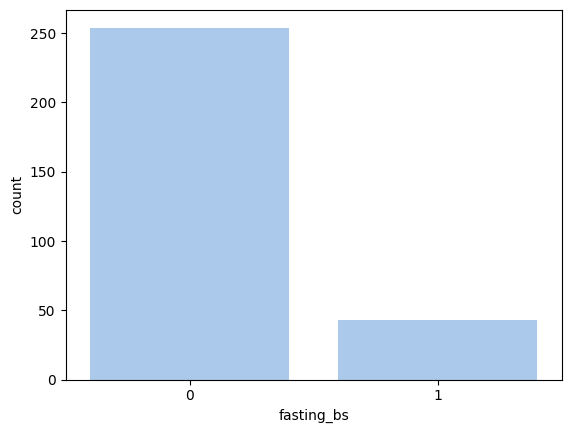

In [23]:
sns.countplot(x='fasting_bs', data=df)

<Axes: xlabel='exercise_angina', ylabel='count'>

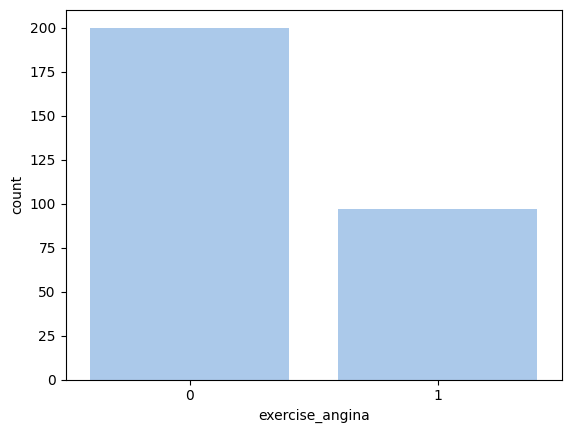

In [24]:
sns.countplot(x='exercise_angina', data=df) 

<Axes: xlabel='gender', ylabel='count'>

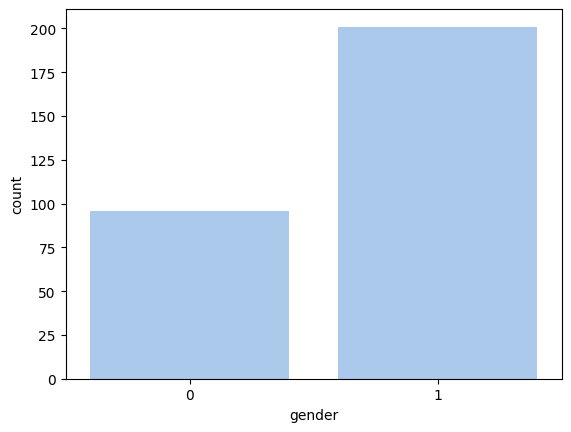

In [25]:
sns.countplot(x='gender', data=df) 

<Axes: xlabel='st_slope', ylabel='count'>

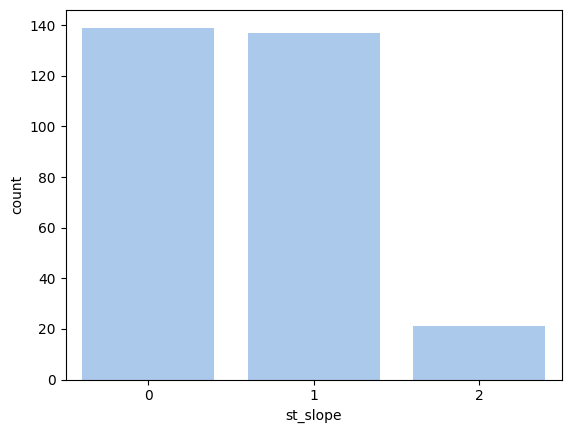

In [26]:
sns.countplot(x='st_slope', data=df) 

<Axes: xlabel='rest_ecg', ylabel='count'>

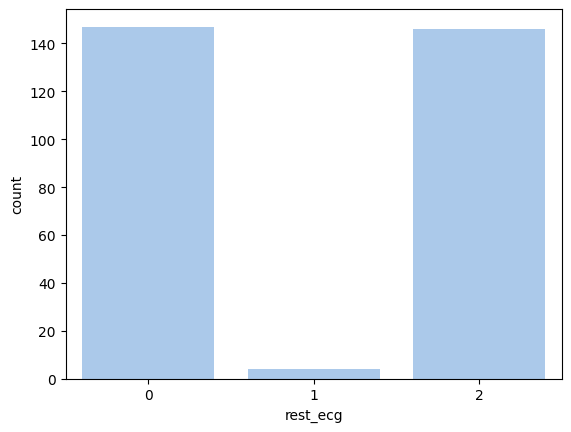

In [27]:
sns.countplot(x='rest_ecg', data=df) 

<Axes: xlabel='num_vessels', ylabel='count'>

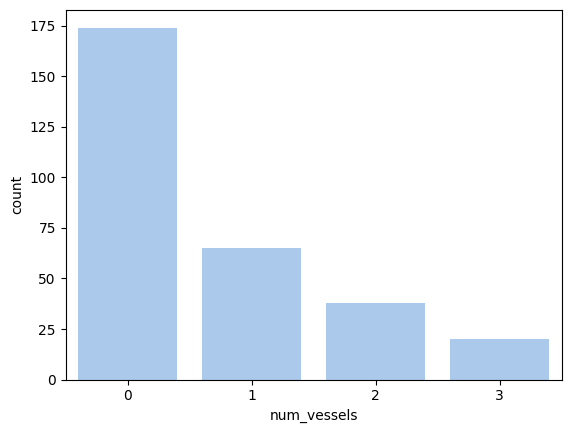

In [28]:
sns.countplot(x='num_vessels', data=df) 

<Axes: xlabel='diagnosis', ylabel='count'>

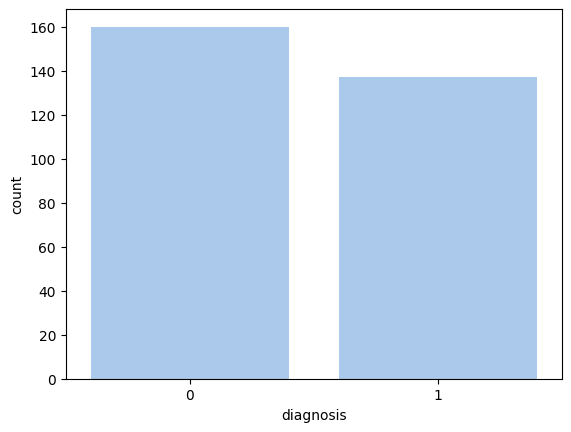

In [29]:
sns.countplot(x='diagnosis', data=df) 

In [35]:
#visualize these plot together 

import matplotlib.pyplot as plt

def cat_plots(data, categories):

    num_plots = 9
    num_cols = 3
    num_rows = 3

    #create the subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    #generate countplots for each category
    for i, category in enumerate(categories):
        sns.countplot(data=df, x=category, ax=axes[i])
        axes[i].set_title(f'Countplot for {category}')
        axes[i].set_xlabel(category)
        axes[i].set_ylabel('Count')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

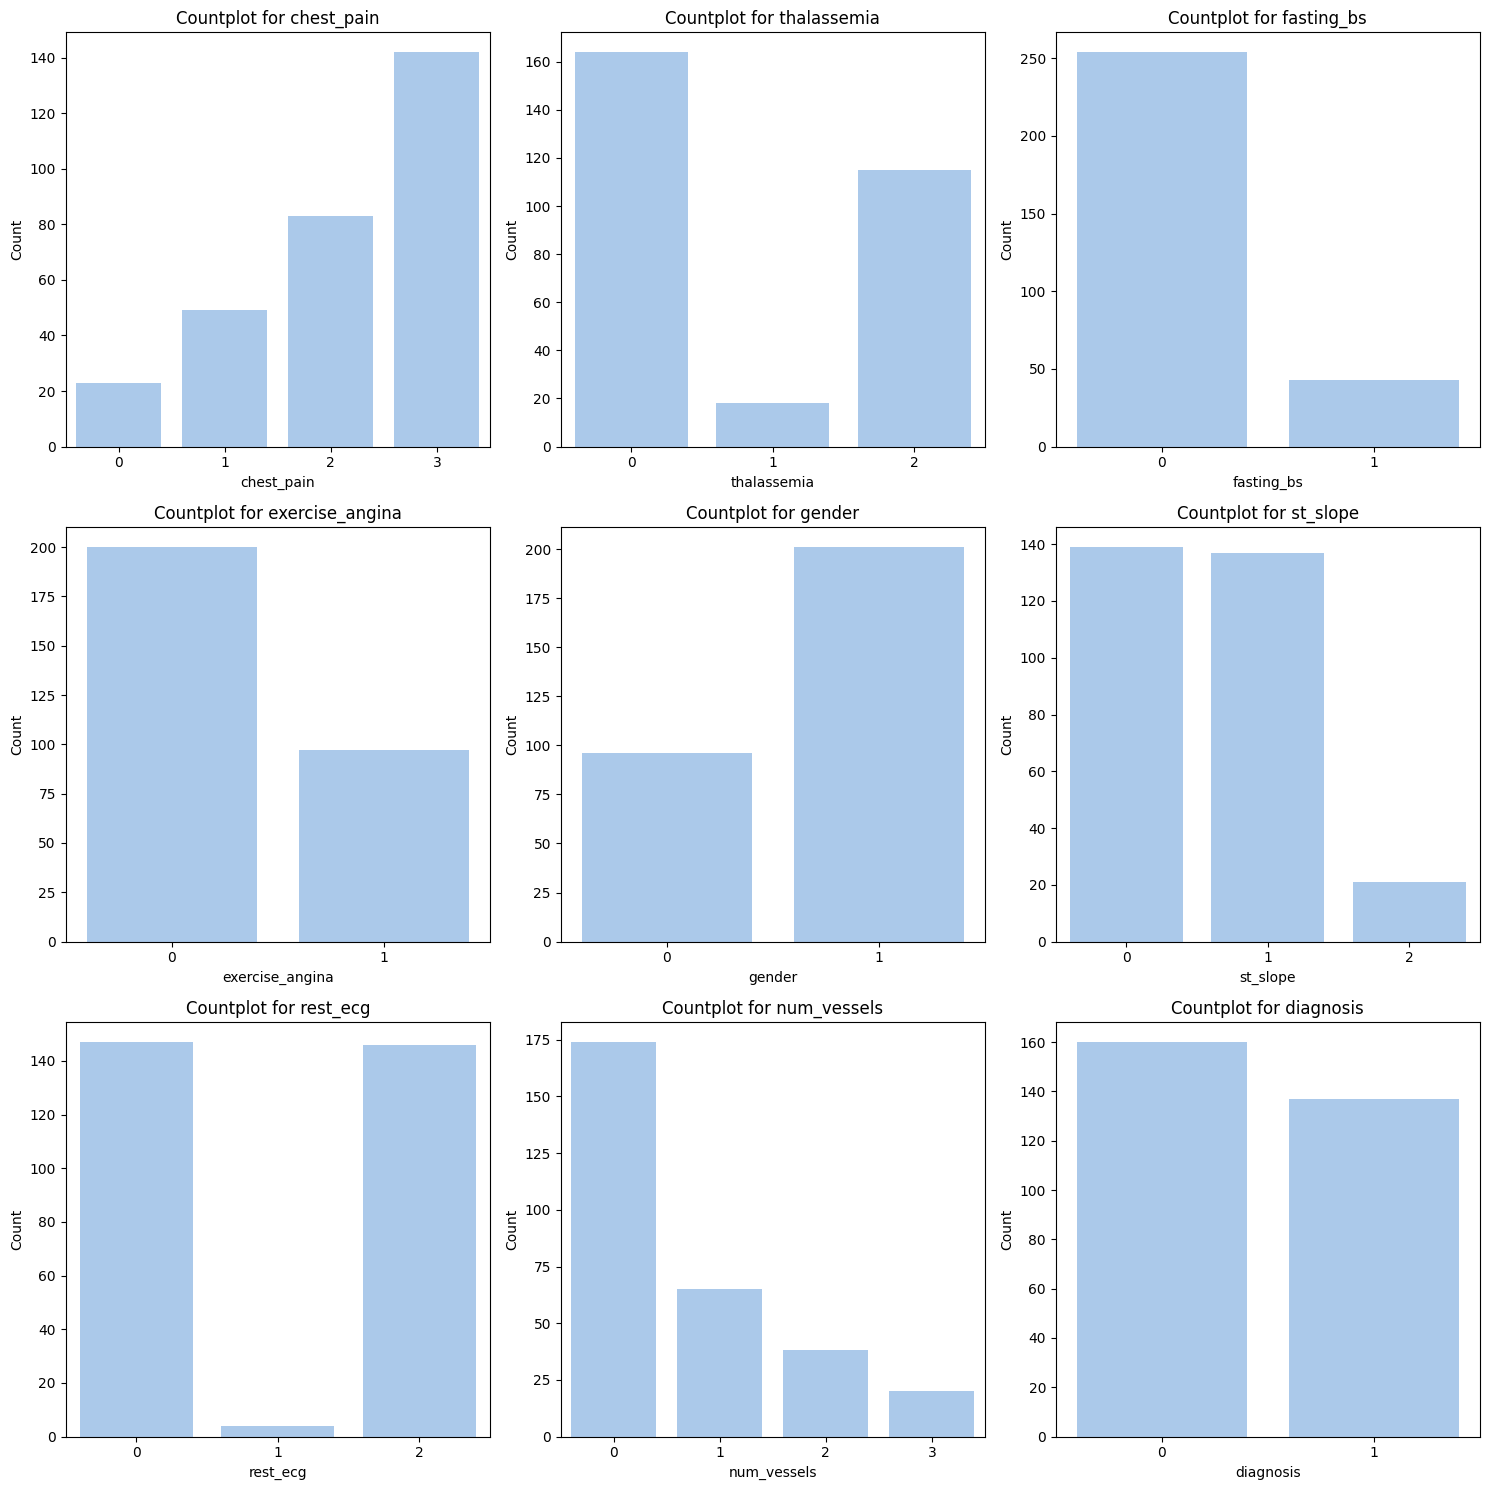

In [36]:
# use function

categories = ['chest_pain', 'thalassemia', 'fasting_bs', 'exercise_angina', 'gender', 'st_slope', 'rest_ecg', 'num_vessels', 'diagnosis']
cat_plots(df, categories)

<Axes: xlabel='rest_bp', ylabel='Count'>

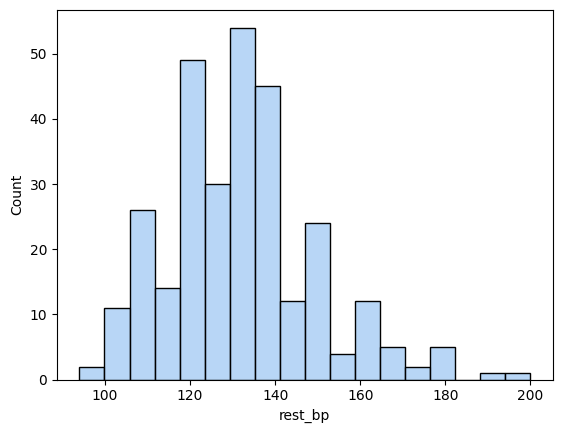

In [30]:
#visualize numerical data

sns.histplot(x='rest_bp', data=df)

<Axes: xlabel='age', ylabel='Count'>

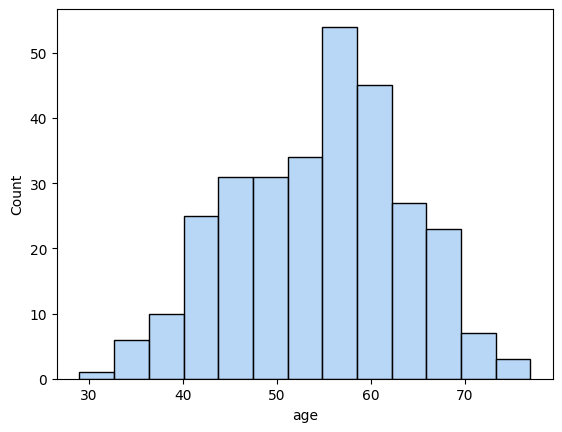

In [31]:
sns.histplot(x='age', data=df)

<Axes: xlabel='max_hr', ylabel='Count'>

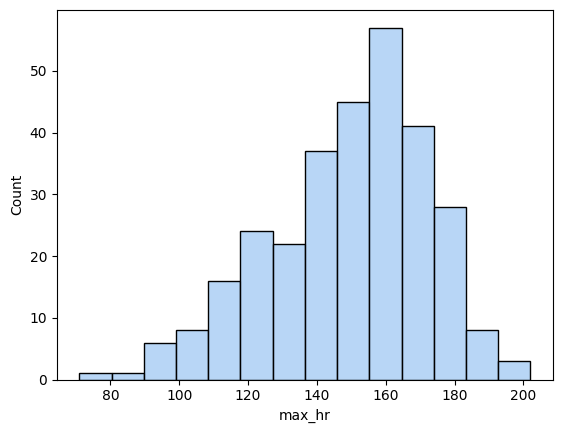

In [32]:
sns.histplot(x='max_hr', data=df)

<Axes: xlabel='cholesterol', ylabel='Count'>

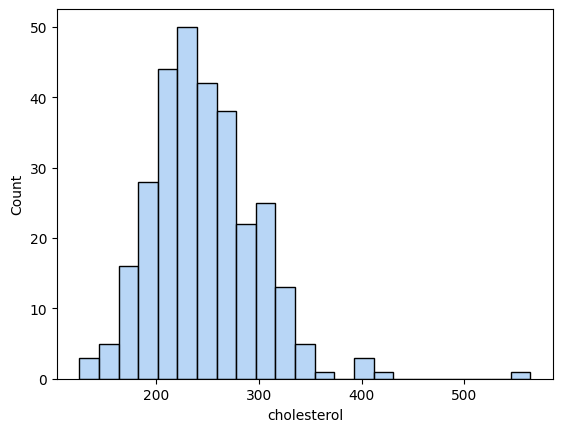

In [33]:
sns.histplot(x='cholesterol', data=df)

<Axes: xlabel='st_depression', ylabel='Count'>

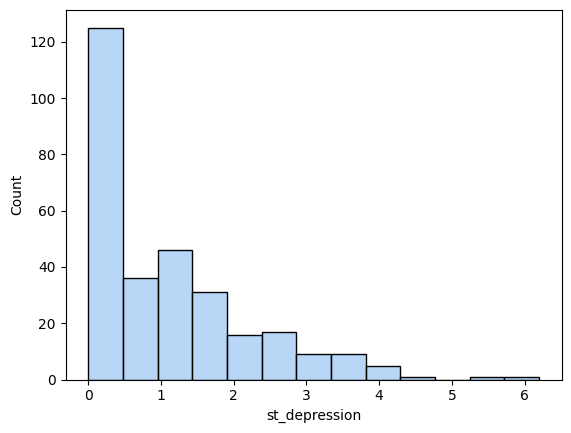

In [34]:
sns.histplot(x='st_depression', data=df)

In [53]:
#visualize these plots together 

import matplotlib.pyplot as plt

def num_plots(data, categories):

    num_plots = 5
    num_cols = 2
    num_rows = 3

    #create the subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    #generate countplots for each numerical category
    for i, category in enumerate(categories):
        sns.histplot(data=df, x=category, ax=axes[i])
        axes[i].set_title(f'Histogram for {category}')
        axes[i].set_xlabel(category)
        axes[i].set_ylabel('Count')

    #remove missing plot
    fig.delaxes(axes[5])
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

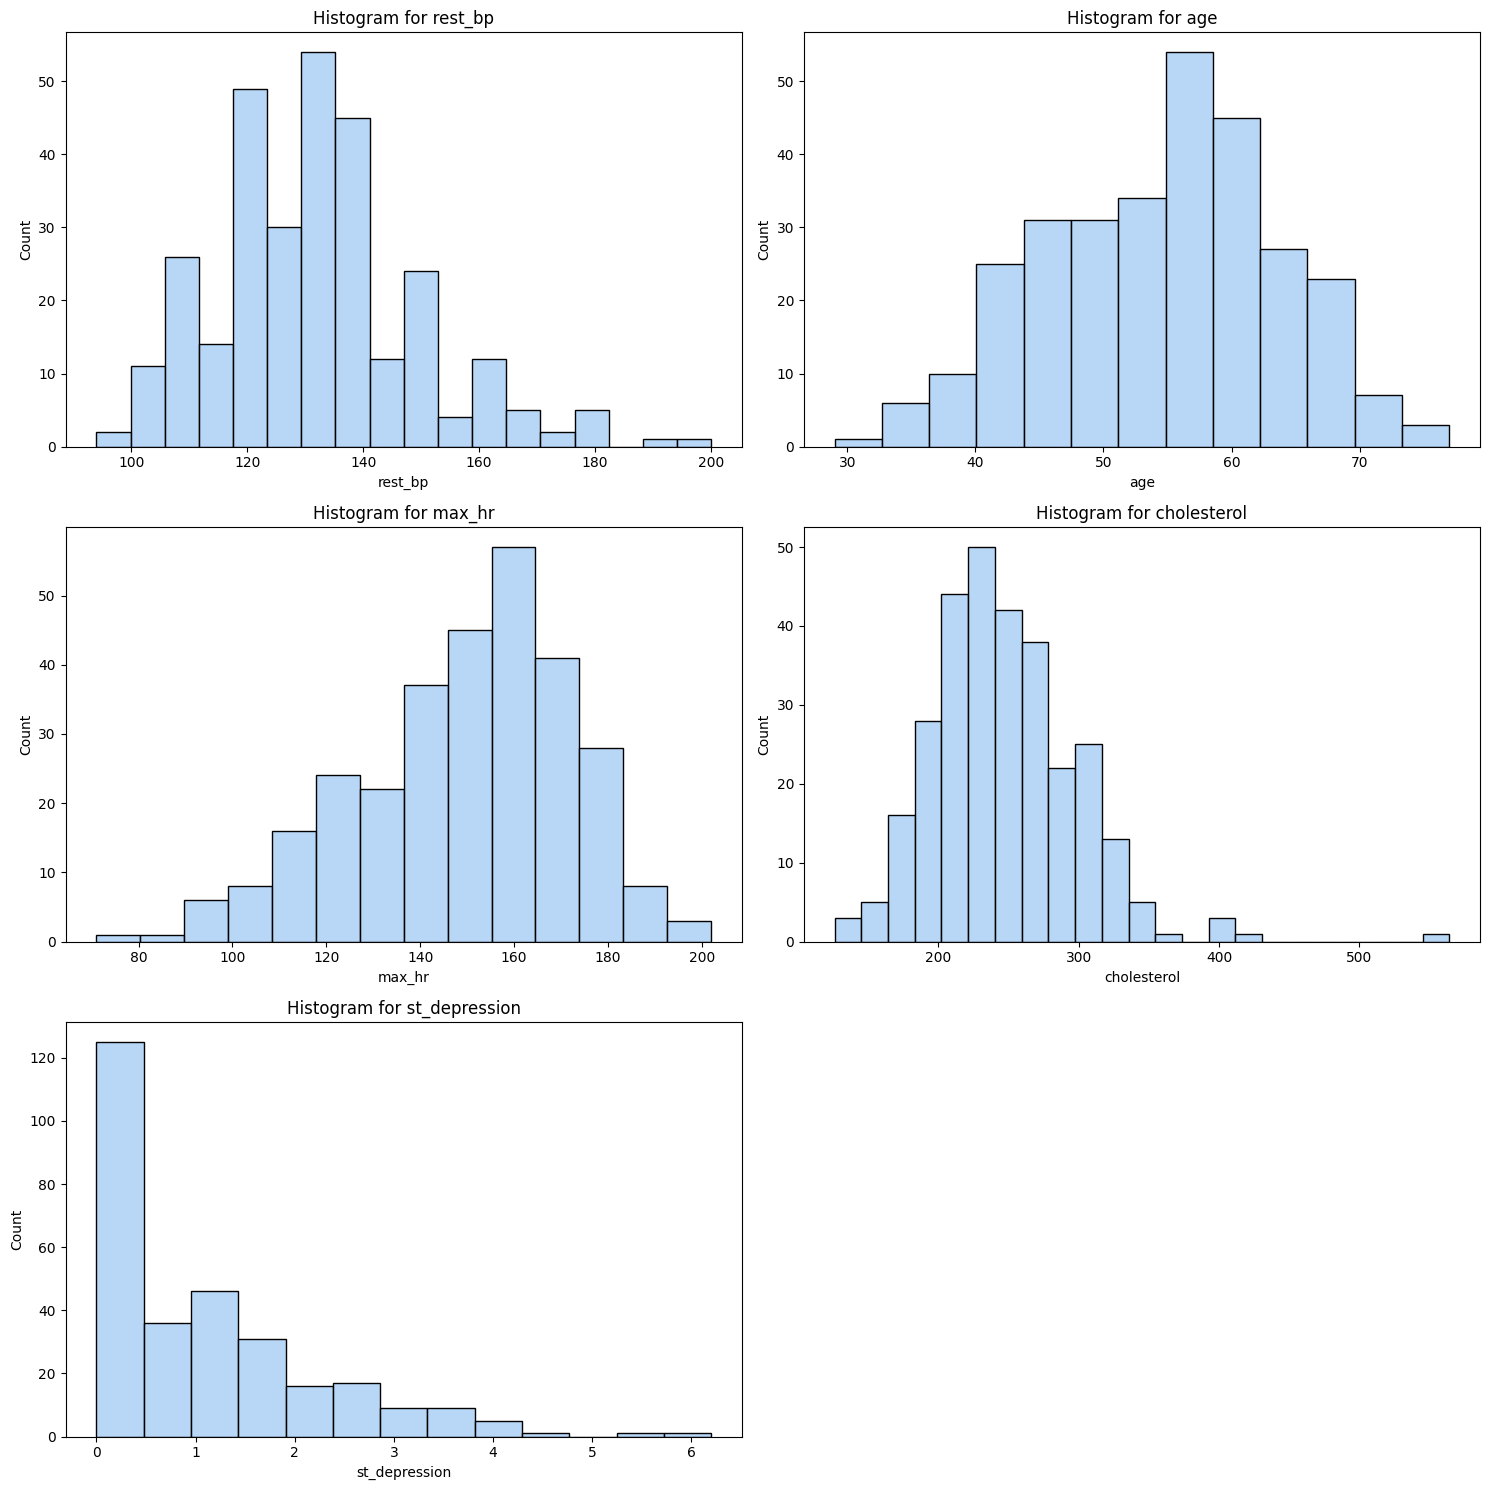

In [54]:
#use for numerical data
categories = ['rest_bp', 'age', 'max_hr', 'cholesterol', 'st_depression']
num_plots(df, categories)

<Axes: xlabel='chest_pain', ylabel='max_hr'>

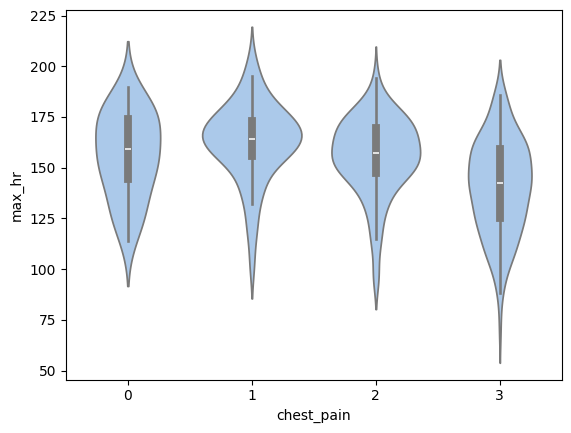

In [78]:
#plotting at some other interesting relationships 

sns.violinplot(data=df, x="chest_pain", y="max_hr")

<Axes: xlabel='exercise_angina', ylabel='age'>

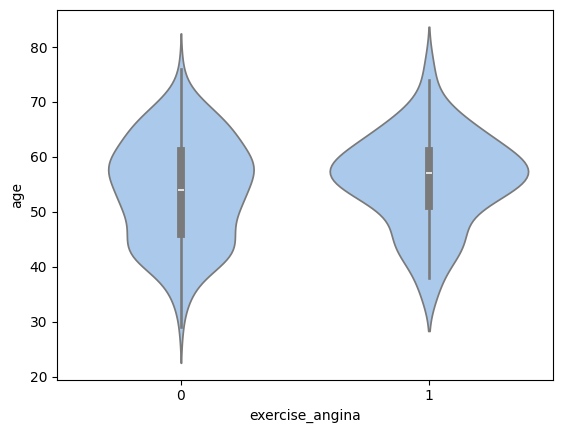

In [73]:
sns.violinplot(data=df, x="exercise_angina", y="age")

<Axes: xlabel='cholesterol', ylabel='max_hr'>

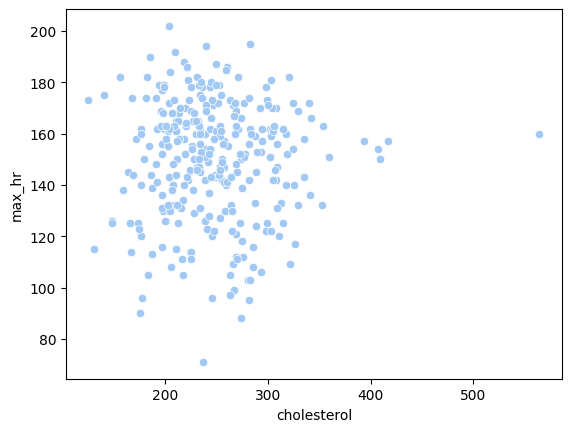

In [79]:
sns.scatterplot(data=df, x="cholesterol", y="max_hr")

In [114]:
categories = ['chest_pain', 'thalassemia', 'fasting_bs', 'exercise_angina', 'gender', 'st_slope', 'rest_ecg', 'num_vessels', 'diagnosis']

# Iterate through the categorical columns and cast each column to integer data type
for col in categories:
    df[col] = df[col].astype(int)

# Perform one-hot encoding using pd.get_dummies()
df_encoded = pd.get_dummies(df, columns=categories, prefix_sep='_', dtype=int)


In [115]:
#testing 3 prediction models
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=10)

In [116]:
#first model is KNN 

model = KNeighborsClassifier()
model.fit(X_train, y_train)
knn_cv_results = cross_val_score(model, X_train, y_train, cv=10)
knn_mean_score = round(knn_cv_results.mean(), 3)
knn_std_score = round(knn_cv_results.std(), 3)

print("Mean score from cross-validation:", knn_mean_score)
print("Standard deviation of the scores:", knn_std_score)

Mean score from cross-validation: 0.653
Standard deviation of the scores: 0.068


In [119]:
# second is decision tree 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
dt_cv_results = cross_val_score(model, X_train, y_train, cv=10)
dt_mean_score = round(dt_cv_results.mean(), 4)

print("Mean score from cross-validation:", dt_mean_score)

Mean score from cross-validation: 0.6887


In [120]:
#third is Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
gb_cv_results = cross_val_score(model, X_train, y_train, cv=10)
gb_mean_score = round(gb_cv_results.mean(), 4)

print("Mean score from cross-validation:", gb_mean_score)

Mean score from cross-validation: 0.7838


In [127]:
#using gb as it is best 

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
sample_data = [[126, 3, 2, 35, 0, 156, 1, 1, 0, 282, 0.0, 2, 0]]
prediction = gb_model.predict(sample_data)

print("Prediction:", prediction)

Prediction: [1]
